## ⌛️Regression Lab Submission ⌛️
### ✏️Submitted by 
> Rahul Patil
> 20083299
> 24 Feb 2019
### ✏️Professor  
> Stepan Ivanov

### ✏️Introduction
> A sample car details data-set is provided to design a Linear Regression model to predict MilesPer-Gallon	performance	of a vehicle based on its characteristics. The provided data is uncleansed and additional processing of  data is required to create an accurate model. After the data is finalised, the variables are converted into the appropriate formats which are readble by the data processing libraries. After exploratory analysis,an initial model will be developed which will be further enchanced. For the sake of better readability, all library exports are done at the begenning of the file.


#### 🔘Importing the standard liblaries 🔘


In [145]:
import pandas as pd_lib
import numpy as np_lib
import matplotlib.pyplot as plot_lib
plot_lib.rcParams['figure.figsize'] = [12, 6]
import seaborn as sea_lib
sea_lib.set_style("darkgrid")
sea_lib.set_context("paper")
from scipy import stats
from scipy.stats import spearmanr, chi2_contingency, bartlett
import statsmodels.formula.api as stats_lib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant





In [79]:
#### 🔘Initial File-Read - Uncleansed Data 🔘


In [80]:
data_to_read = pd_lib.read_csv('./regression_lab.csv')


#### 🔘Checking for Null Values in Data and Data-Type of the column 🔘


In [7]:
print(data_to_read.isnull().any())
print(data_to_read.dtypes)


mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


- 🔘Horsepower is not a primitive data-type, needs to be converted for a standardized data 🔘
- 🔘Horsepower is not a primitive data-type, needs to be converted for a standardized data 🔘
- 🔘Horsepower conatins missing values with '?' entery, need to perform the cleansing here 🔘
- 🔘Replacing the missing values '?' with NaN 🔘


In [8]:
data_to_read.replace({'horsepower': {'?': np_lib.nan}}, regex=False,inplace=True)

- 🔘Changing data-type of the column Horsepower from Object to Float

In [9]:
data_to_read['horsepower'] = pd_lib.to_numeric(data_to_read['horsepower'])

- 🔘Since it isn't mention how to treat the missing values, I'm choosing to replace the values with the median 🔘

In [11]:
median = data_to_read['horsepower'].median()
data_to_read['horsepower'].fillna(median, inplace=True)

- 🔘Car Origin is defined as a ordinal categorical variable so we need to create their dummpy origins based off the unique integers 🔘

In [12]:
data_to_read['Origin Country'] = data_to_read.origin.replace([1,2,3],['Ireland','Spain','France'])

- 🔘String value for car-name is stored as object which is the defaut dtype for strings hence no explicit conversion to astype(str) is needed,
- 🔘But To consider the car names to build a model, each car name must be assigned a unique ID with respect to the names and stored in a new column

In [13]:
data_to_read['id'] = data_to_read.groupby('car name').ngroup()

- 🔘The Data is cleansed now and should be written and read from a new CSV for modelling 🔘

In [14]:
data_to_read.to_csv('regression_lab_cleansed.csv', index=False)

- 🔘Read the data from the new CSV 🔘


In [15]:
cars_data = pd_lib.read_csv('./regression_lab_cleansed.csv')

- 🔘Initial Knowledge of the new data 🔘

In [16]:
print(cars_data.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin          id  
count    398.000000  398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  148.550251  
std        2.757689    3.697627    0.802055   89.495880  
min        8.000000   70.000000    1.000000    0.000000  
25%       13.825000   73.000000    1.000000   65.250000  
50%

🔘Establishing Co-relation between different numerical variables 
Checking if Data is qualifiable for the Pearson Co-relation analysis/Confirming Normality 
Visualizing the required attributes after plotting them to ensure
 - Data is normally distributed
 - Data is Linear in Nature
 - Data is Continous numeric variable

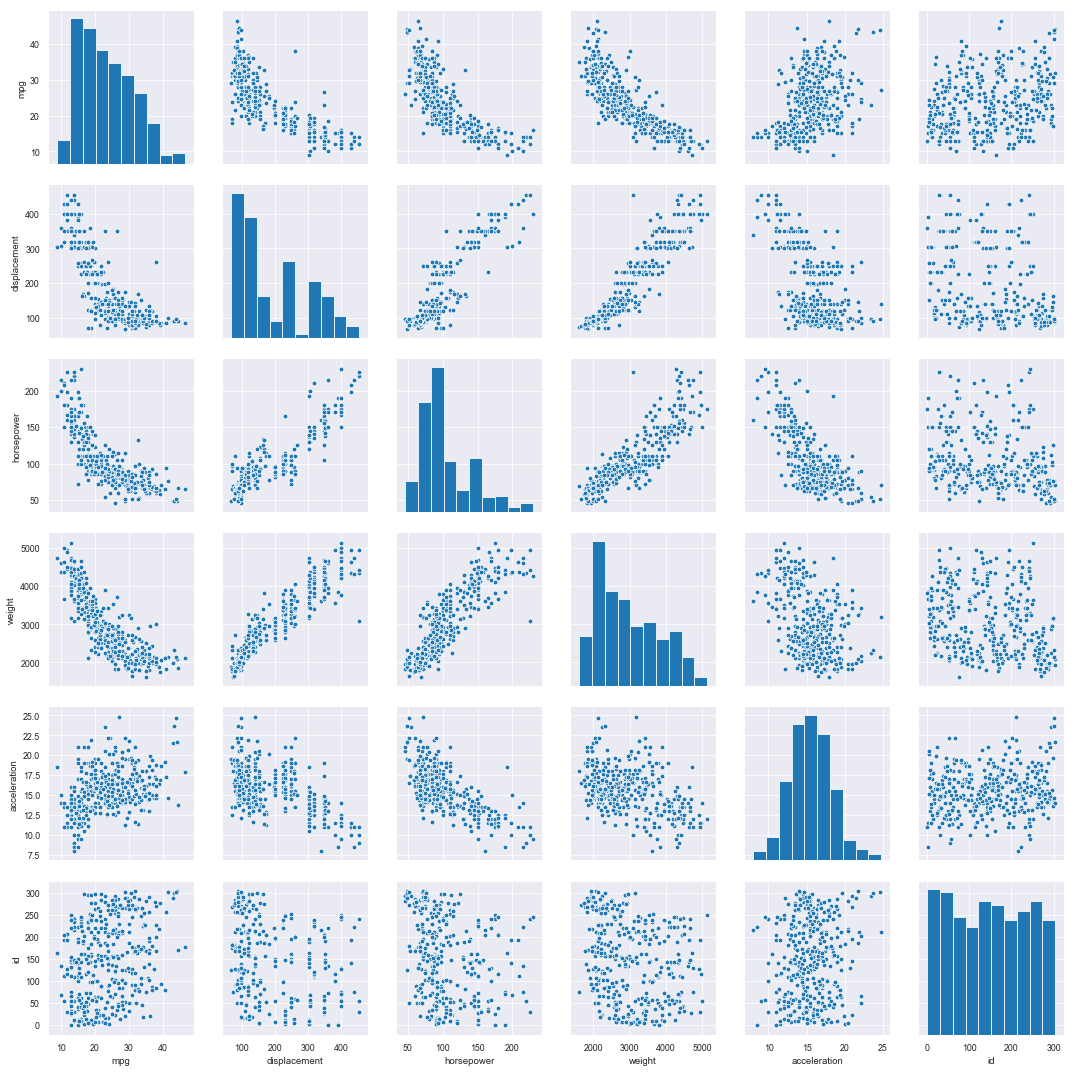

In [17]:
numeric_attr = cars_data[['mpg','displacement', 'horsepower', 'weight','acceleration', 'id']]
sea_lib.pairplot(numeric_attr)
plot_lib.show()

- 🔘Checking if the varibles are Co-related using Pearson's Co-Relation/Pearson R test


In [18]:
co_relation = cars_data.corr()
print(co_relation)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   
id            0.273936  -0.275754     -0.292064   -0.233575 -0.255247   

              acceleration  model year    origin        id  
mpg               0.420289    0.579267  0.563450  0.273936  
cylinders        -0.505419   -0.348746 -0.562543 -0.275754  
displacement     -0.543684   -0.370164 -0.609409 -0.292064  
horsepower       -0.68659

- 🔘Visualize Co-relation using a Heatmap to know which varibles have a strong linearity

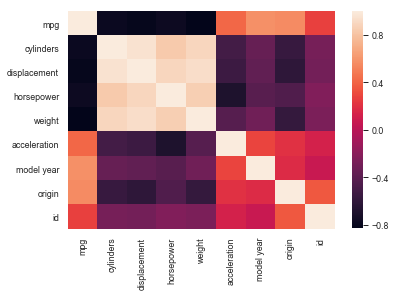

In [19]:
sea_lib.heatmap(co_relation, xticklabels=co_relation.columns.values, yticklabels=co_relation.columns.values)
plot_lib.show() 

#### 📊Observations
> The variables with the value of R = 1 have a strong positive relationship. R = 0 are not linearly co-related. R = -1 have a strong negative relationship. For instance, the linear relationship between cylinder - displacement of value 0.950721 shows a strong relation and the relation between mpg - weight of value -0.831741 has a strong negative relationship.

- 🔘Establishing Co-relation between different categorical values
- 🔘Ensuring that the variables are periodic in nature to be considered as categorical

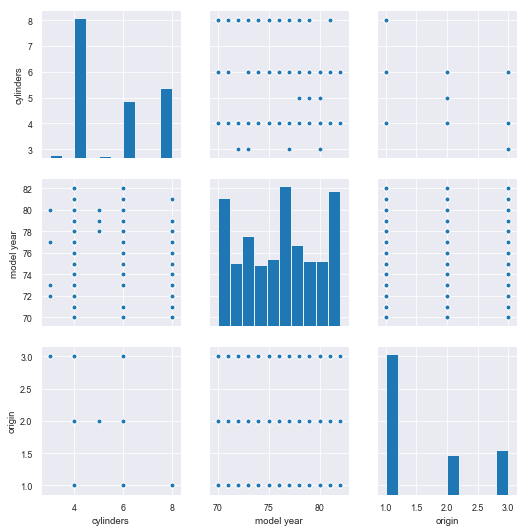

In [20]:
categorical_attr = cars_data[['cylinders', 'model year', 'origin']]
sea_lib.pairplot(categorical_attr)
plot_lib.show()

🔘 Spearman's R Co-relation and Chi-Sqaured test are used to establish a co-relation between categorical variables.Spearman's Rank Assumptions are as follows
 - Data is ordial in nature
 - Data is related non-linearly 
 - Data is non-normally distributed


- 🔘Checking if the varibles are linearly Co-related using Spearman's Co-Relation 🔘

In [22]:
cylinders_var = cars_data['cylinders']
model_var = cars_data['model year']
origin_var = cars_data['origin']
spearman_coefficient, p_value = spearmanr(cylinders_var, model_var)
print(spearman_coefficient,p_value)
spearman_coefficient, p_value = spearmanr(origin_var, model_var)
print(spearman_coefficient,p_value)
spearman_coefficient, p_value = spearmanr(cylinders_var, origin_var)
print(spearman_coefficient,p_value)

-0.3350123872303804 6.802811389146856e-12
0.16655117205854467 0.000851274208977142
-0.6045504520013154 5.052596642310571e-41


#### 📊Observations
> The variables with the value of R = 1 have a strong positive relationship. R = 0 are not linearly co-related. R = -1 have a strong negative relationship. For instance, the linear relationship between cylinders - origin of value -0.6045504520013154 shows a moderate negative relation and the variables origin - model year of value 0.166551172058544671 are not related at all.

- 🔘Performing Chi-Squared test of independence to check if the categorical variables are independent of one another
- 🔘Chi-Squared test needs the variables to be in a crosstab format.

In [24]:
ctab_table = pd_lib.crosstab(cylinders_var, model_var)
chi_2, p_value, dof, expected = chi2_contingency(ctab_table.values)
print(chi_2,p_value)
ctab_table = pd_lib.crosstab(cylinders_var, origin_var)
chi_2, p_value, dof, expected = chi2_contingency(ctab_table.values)
print(chi_2,p_value)
ctab_table = pd_lib.crosstab(origin_var, model_var)
chi_2, p_value, dof, expected = chi2_contingency(ctab_table.values)
print(chi_2,p_value)

121.95983780804852 2.3058173006596285e-08
180.10177141976715 9.800693325588298e-35
45.43156646213089 0.005177256304327607


#### 📊Observations
> The variables with the P value > 0.005 accepts the null hypothesis and concludes the variables are independent. The variables with the P value < 0.005 rejects the null hypothesis and concludes the variables are co-related. For instance, the relationship between cylinders - model year of value 2.3058173006596285 shows that they are strongly independent and the variables origin - model year of value 0.005177256304327607 are moderately independent thereby accepting the null hypothesis.

### ✏️ Regression Model Planning

> After exploring the data in the previous steps, we have a rough idea about the varibles and how they're related to each other which would help in designing the regression model. A regression model must satisfy the following assumptions
- Linear relationship
- Multivariate normality
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity
> Our variables must be tested for the same before including them in the model.

- 🔘Initial Model Analyis with respect to different variables. Here, we consider different independent vriables and see how they influence the dependent variable.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     416.5
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           7.91e-64
Time:                        19:39:54   Log-Likelihood:                -1699.5
No. Observations:                 398   AIC:                             3401.
Df Residuals:                     397   BIC:                             3405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement     0.0807      0.004     20.409   

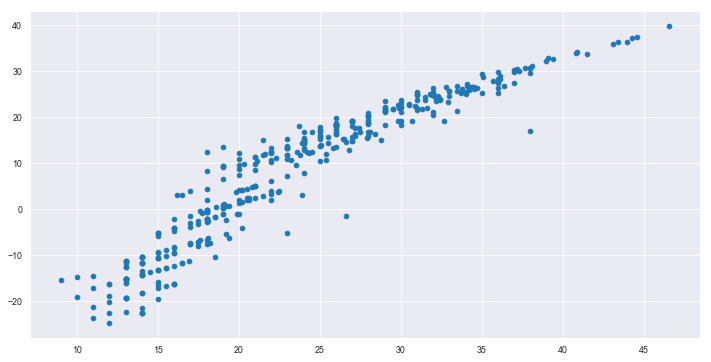

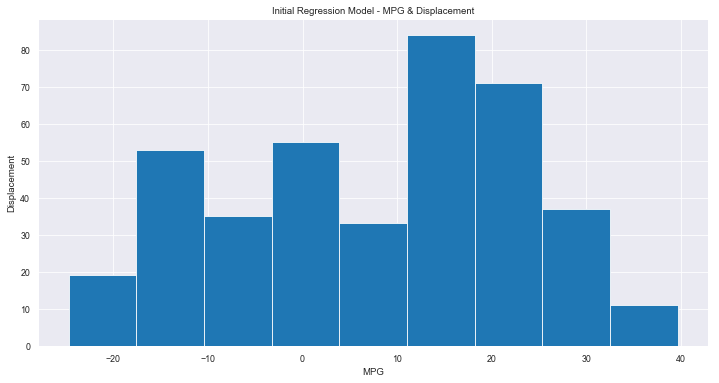

In [182]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['displacement']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.ylabel('Displacement')
plot_lib.xlabel('MPG')
plot_lib.title('Initial Regression Model - MPG & Displacement')
plot_lib.show()


#### 📊Observations
> R-squared value is moderate and the P-Value is less than 0.05 so the model is statistically significant. The model could be enchaned with adding additional variables or using Log to transform the variable.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1228.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          1.67e-170
Time:                        20:37:59   Log-Likelihood:                -1449.4
No. Observations:                 398   AIC:                             2903.
Df Residuals:                     396   BIC:                             2911.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement    -0.1761      0.008    -20.945   

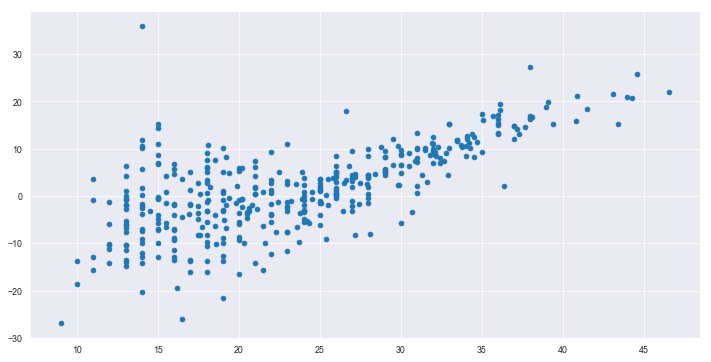

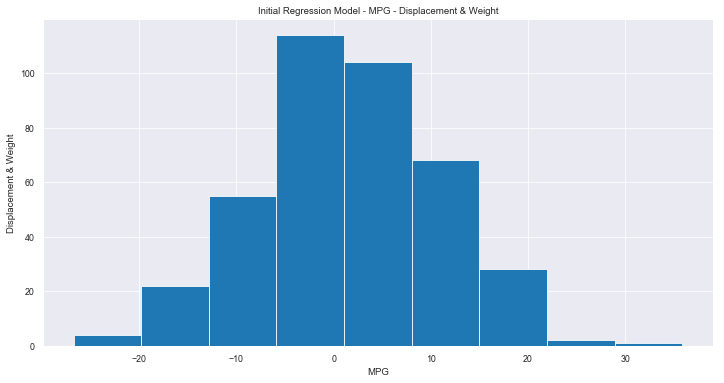

In [185]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['displacement','weight']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.ylabel('Displacement & Weight')
plot_lib.xlabel('MPG')
plot_lib.title('Initial Regression Model - MPG - Displacement & Weight')
plot_lib.show()
plot_lib.show()


#### 📊Observations
> R-squared value is high and the P-Value is less than 0.05 so the model is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     903.4
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          2.48e-104
Time:                        20:40:42   Log-Likelihood:                -1606.2
No. Observations:                 398   AIC:                             3214.
Df Residuals:                     397   BIC:                             3218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cylinders      3.6146      0.120     30.057      0.0

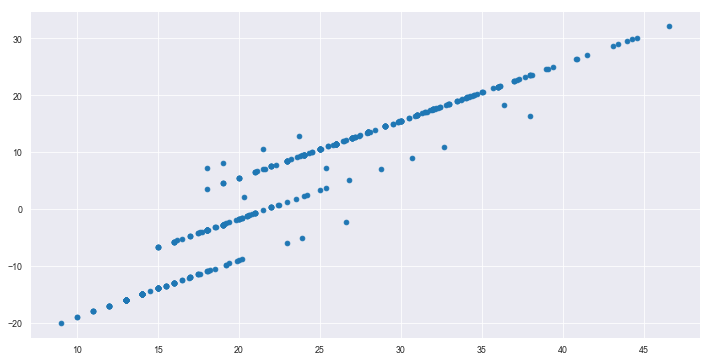

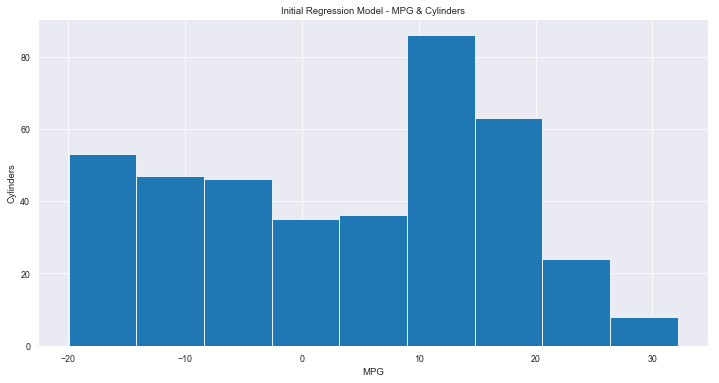

In [186]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['cylinders']], missing='drop')

# Train the model using the training sets
results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.ylabel('Cylinders')
plot_lib.xlabel('MPG')
plot_lib.title('Initial Regression Model - MPG & Cylinders')
plot_lib.show()


#### 📊Observations
> We are modelling here with a non-categorical variable 'Cylinders'which shows a moderate R-Squared value and can be enhanced using additional variables. We will use another categorical variable to enhance the model.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     6486.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          2.44e-303
Time:                        20:43:38   Log-Likelihood:                -1142.0
No. Observations:                 398   AIC:                             2288.
Df Residuals:                     396   BIC:                             2296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cylinders     -3.2107      0.119    -27.088      0.0

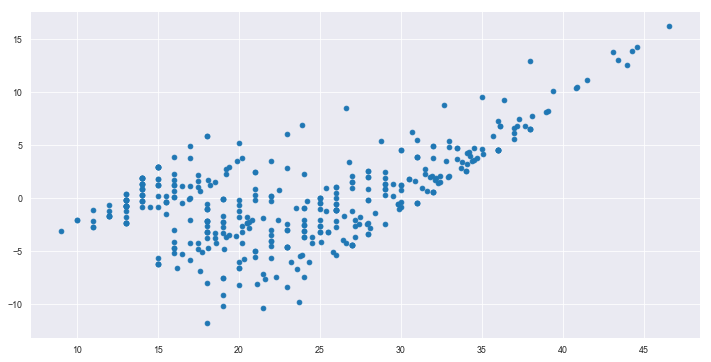

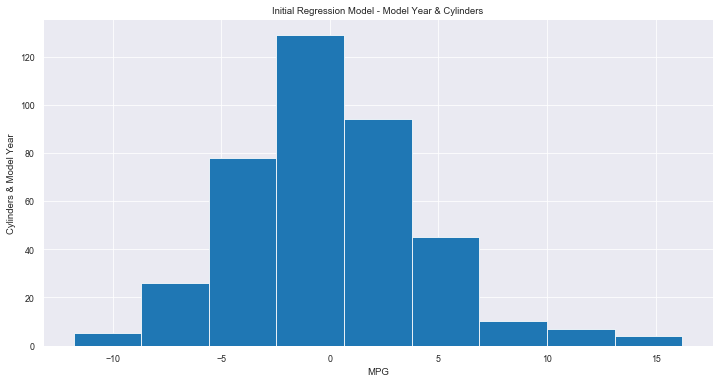

In [187]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['cylinders','model year']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.ylabel('Cylinders & Model Year')
plot_lib.xlabel('MPG')
plot_lib.title('Initial Regression Model - Model Year & Cylinders')
plot_lib.show()


#### 📊Observations
> As we can notice, adding more variables enchaces the model but due to high co-relation between them, additional processing needs to be done to make sure other linear regression assumptions are satisfied.

- 🔘Now let's try enhancing the model with one categorical and one numerical attribute with respect to the dependent variable.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2538.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          1.51e-226
Time:                        20:47:45   Log-Likelihood:                -1319.7
No. Observations:                 398   AIC:                             2643.
Df Residuals:                     396   BIC:                             2651.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -1.1000      0.144     -7.614   

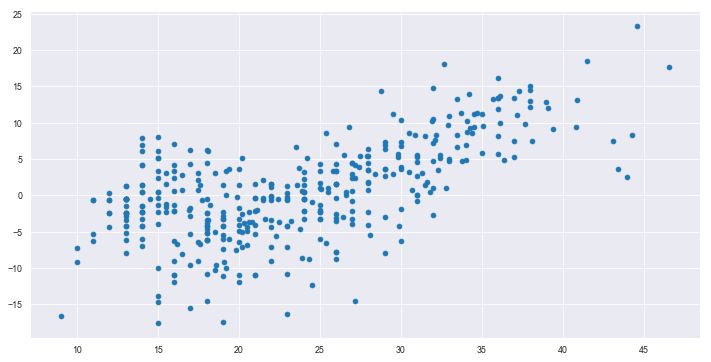

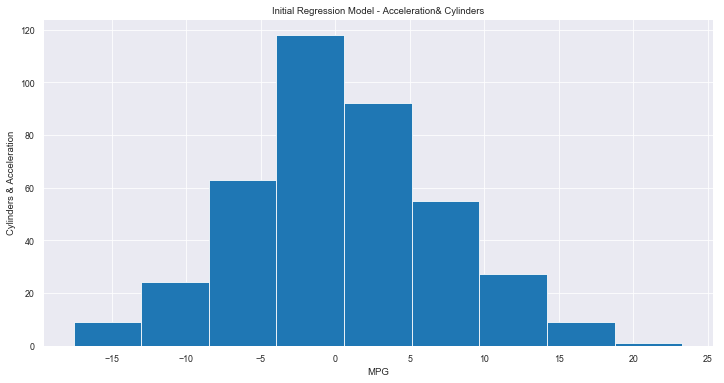

In [188]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['cylinders','acceleration']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.ylabel('Cylinders & Acceleration')
plot_lib.xlabel('MPG')
plot_lib.title('Initial Regression Model - Acceleration& Cylinders')
plot_lib.show()


#### 📊Observations
> As we can notice, combining categorical & numerical variables enchaces the model to a good limit. Now we have examied the base model with respect to different variables, we must proceed designing our main model thereby satisfying the regression assumptions.

- 🔘The first assumption that is Linear relationship. There should be a Linear relationship between the response variables and the predictor. Checking the linearity assumption is done by plotting of predictor versus response variables. We are checking the relationship with respect to the residuals. 

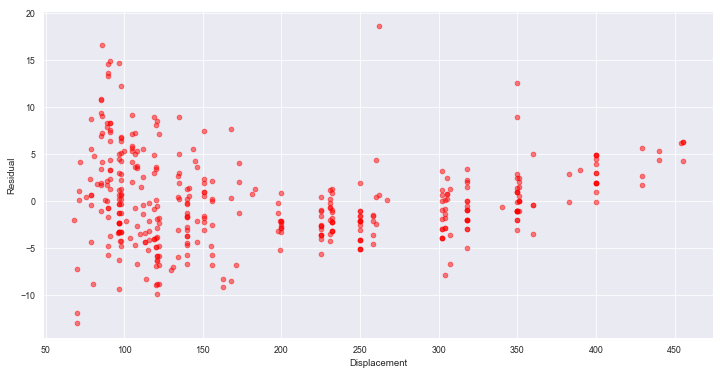

In [194]:
results = stats_lib.ols(formula='mpg ~ displacement', data=cars_data).fit()
Y_pred = results.predict(cars_data[["displacement"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["displacement"]],residual, c="red", alpha=0.5)
plot_lib.xlabel("Displacement")
plot_lib.ylabel("Residual")
plot_lib.show()

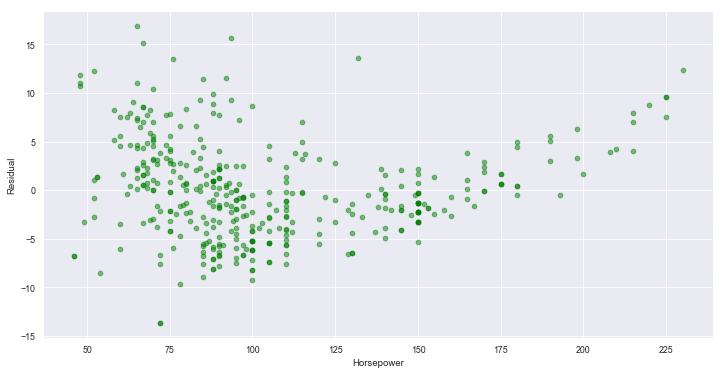

In [195]:
results = stats_lib.ols(formula='mpg ~ horsepower', data=cars_data).fit()
Y_pred = results.predict(cars_data[["horsepower"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["horsepower"]],residual, c="green", alpha=0.5)
plot_lib.xlabel("Horsepower")
plot_lib.ylabel("Residual")
plot_lib.show()

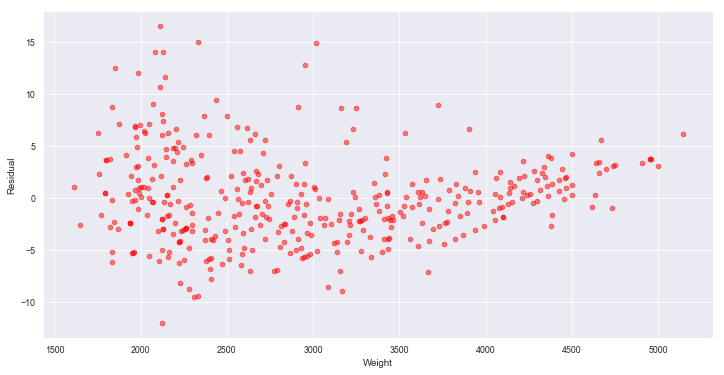

In [196]:
results = stats_lib.ols(formula='mpg ~ weight', data=cars_data).fit()
Y_pred = results.predict(cars_data[["weight"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["weight"]],residual,c="red", alpha=0.5)
plot_lib.xlabel("Weight")
plot_lib.ylabel("Residual")
plot_lib.show()

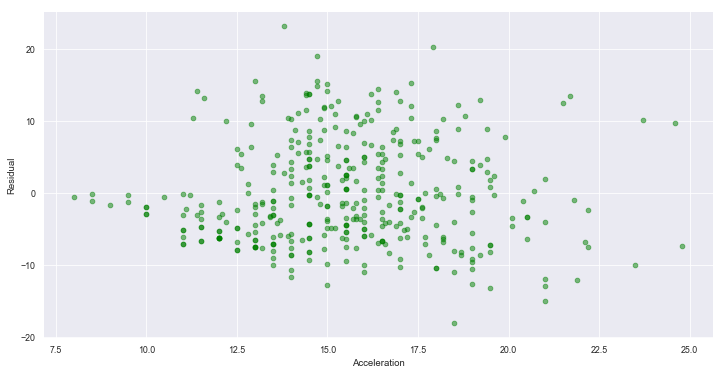

In [197]:
results = stats_lib.ols(formula='mpg ~ acceleration', data=cars_data).fit()
Y_pred = results.predict(cars_data[["acceleration"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["acceleration"]],residual,c="green", alpha=0.5)
plot_lib.xlabel("Acceleration")
plot_lib.ylabel("Residual")
plot_lib.show()

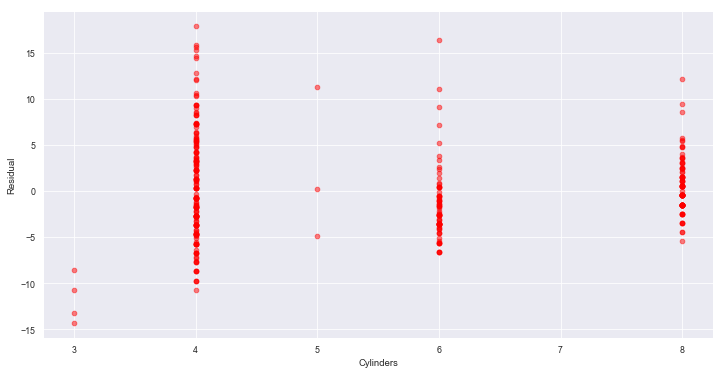

In [198]:
results = stats_lib.ols(formula='mpg ~ cylinders', data=cars_data).fit()
Y_pred = results.predict(cars_data[["cylinders"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["cylinders"]],residual,c="red", alpha=0.5)
plot_lib.xlabel("Cylinders")
plot_lib.ylabel("Residual")
plot_lib.show()

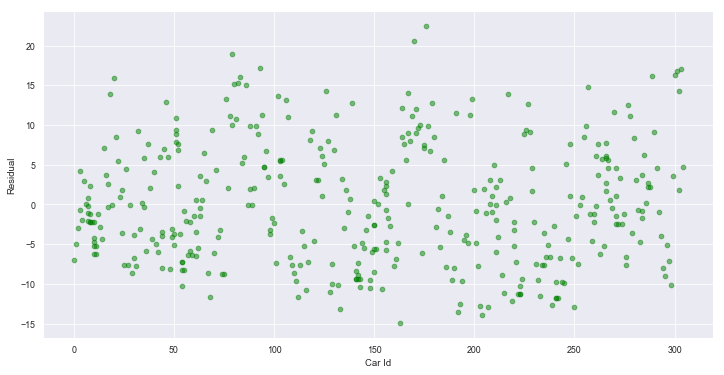

In [199]:
results = stats_lib.ols(formula='mpg ~ id', data=cars_data).fit()
Y_pred = results.predict(cars_data[["id"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["id"]],residual,c="green", alpha=0.5)
plot_lib.xlabel("Car Id")
plot_lib.ylabel("Residual")
plot_lib.show()

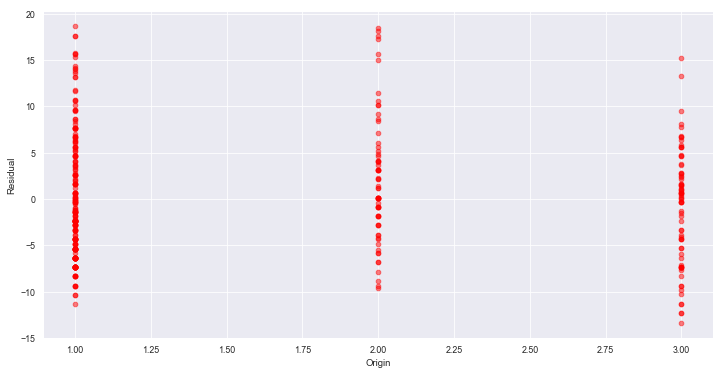

In [200]:
results = stats_lib.ols(formula='mpg ~ origin', data=cars_data).fit()
Y_pred = results.predict(cars_data[["origin"]])
residual = cars_data["mpg"].values-Y_pred
plot_lib.scatter(cars_data[["origin"]],residual,c="red", alpha=0.5)
plot_lib.xlabel("Origin")
plot_lib.ylabel("Residual")
plot_lib.show()

### 📊Observations
> The numerical variables seem to show a strong linear relationship between them and the response/dependent variable that is mpg. Categorical varibles don't show a linear relationship with mpg.

❗️Note - The column model year is ignored here for compilation purposes.

- 🔘The second assumption is Multivariate normality.Linear regression analysis requires all variables to be multivariate normal.This assumption can best be checked with a histogram or a Q-Q-Plot.

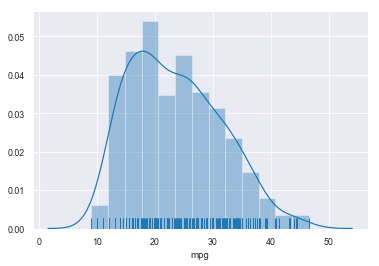

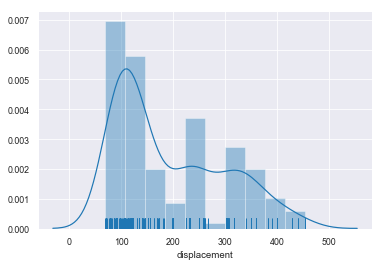

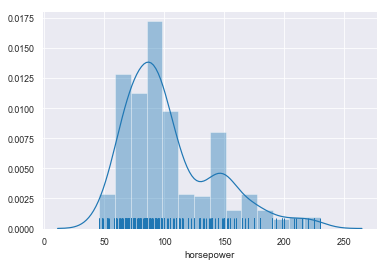

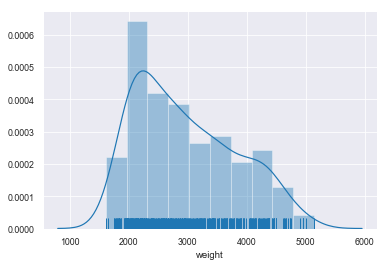

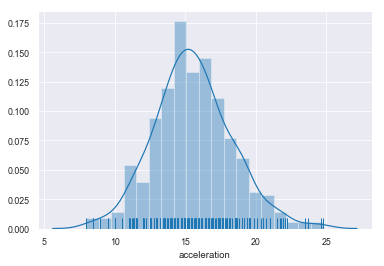

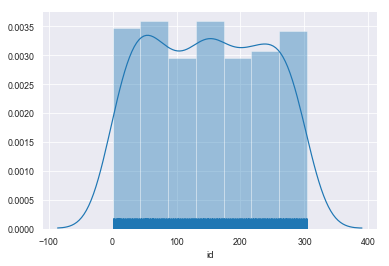

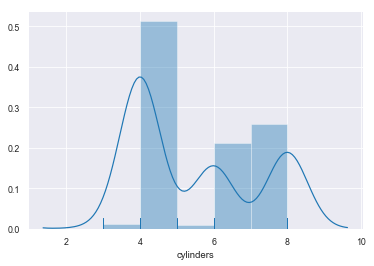

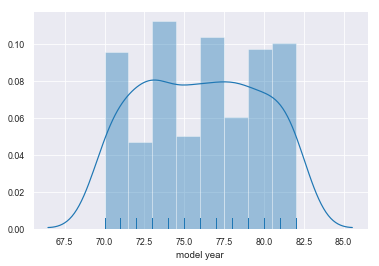

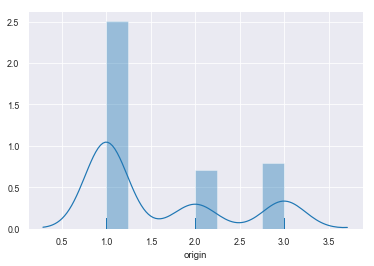

In [29]:
sea_lib.distplot(cars_data['mpg'], kde=True, rug=True,)
plot_lib.show()
sea_lib.distplot(cars_data['displacement'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['horsepower'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['weight'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['acceleration'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['id'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['cylinders'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['model year'], kde=True, rug=True)
plot_lib.show()
sea_lib.distplot(cars_data['origin'], kde=True, rug=True)
plot_lib.show()

- 🔘Thirdly, linear regression assumes that there is little or no multicollinearity in the data.Multicollinearity occurs when the independent variables are too highly correlated with each other. To address the issue of multicollinearity, let's run a multiple regression model with the predictor variables and test the R values. Ideally, we will be using VIF (Variance Inflation Factor (VIF)) to solve the multicollinearity problem.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2986.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:05:16   Log-Likelihood:                -1046.8
No. Observations:                 398   AIC:                             2108.
Df Residuals:                     391   BIC:                             2135.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement     0.0227      0.008      3.018   

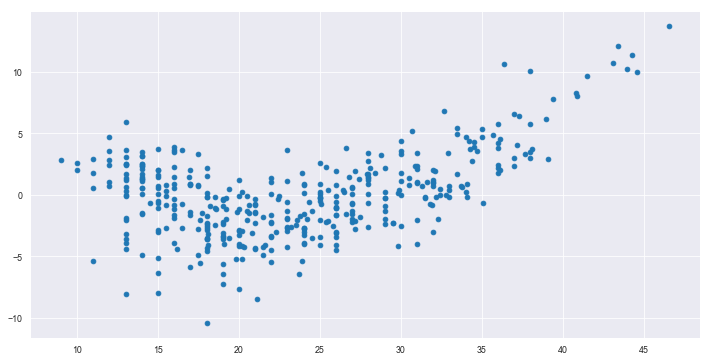

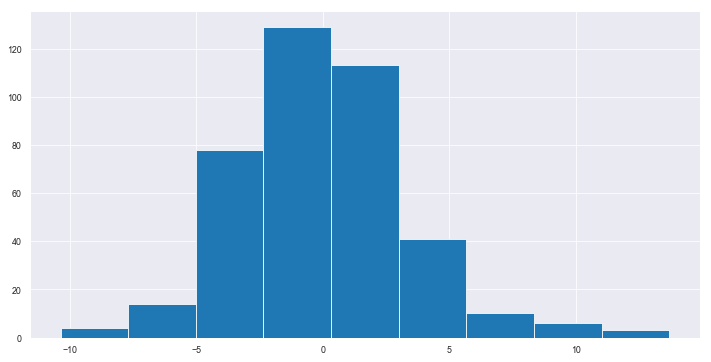

In [167]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['displacement', 'weight','cylinders','horsepower','origin','model year','id']], missing='drop')

# Train the model using the training sets
results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9)
plot_lib.show()


- 🔘The variable acceleration has a high P-Value of 0.445 which shows a strong multicollinearity. We need to enchance the variable by calculating their VIF given the R-Squared values.

In [236]:
#Function to calculate VIF across all the columns
mpg = cars_data['mpg']
cylinders = cars_data['cylinders']
displacement = cars_data['displacement']
horsepower = cars_data['horsepower']
weight = cars_data['weight']
acceleration = cars_data['acceleration']
model = cars_data['model year']
origin = cars_data['origin']
ids = cars_data['id']
df = pd_lib.DataFrame({'mpg':mpg,'cylinders' : cylinders, 'displacement':displacement,'horsepower':horsepower,'weight':weight,'acceleration':acceleration,'model':model,'origin':origin,'ids':ids})
df_cor = df.corr()
pd_lib.DataFrame(np_lib.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,ids
mpg,5.643142,0.501538,-1.491727,0.319579,4.152347,-0.204931,-2.027450,-0.746658,-0.262015
cylinders,0.501538,10.745135,-10.325703,1.246887,-0.883360,0.222703,-0.092936,-0.524611,0.042891
displacement,-1.491727,-10.325703,22.343149,-4.227712,-7.254418,0.898685,0.905937,2.056174,0.324405
horsepower,0.319579,1.246887,-4.227712,9.477815,-4.185144,2.960312,0.636598,-0.956584,0.084129
weight,4.152347,-0.883360,-7.254418,-4.185144,13.713267,-2.593057,-2.127090,-0.102169,-0.448637
acceleration,-0.204931,0.222703,0.898685,2.960312,-2.593057,2.562715,0.210096,0.035763,0.052266
model,-2.027450,-0.092936,0.905937,0.636598,-2.127090,0.210096,1.973625,0.244772,0.137481
origin,-0.746658,-0.524611,2.056174,-0.956584,-0.102169,0.035763,0.244772,1.948073,-0.313411
ids,-0.262015,0.042891,0.324405,0.084129,-0.448637,0.052266,0.137481,-0.313411,1.179350


- 🔘In the above data, the diagnol elements give the VIF of the variables. Displacement has a high VIF of 22.343149 followed by weight which is 13.713267. This means, there is a very high multicollinearity which needs to be looked into.

- 🔘 The fourth assumption is the rule of Homoscedasticity that is residuals between the dependent and the independent variable is same across all the values of independent variable. We can detect Homoscedasticity using Barlett's method from the stats module.

### 🔧 Work In Progress 🔧
- Figuring out how to address Homoscedasticity in Python

- 🔘Since now we have our Assumptions at place, let's create a regression model with all the variables included.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2610.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                -1046.5
No. Observations:                 398   AIC:                             2109.
Df Residuals:                     390   BIC:                             2141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
displacement     0.0218      0.008      2.858   

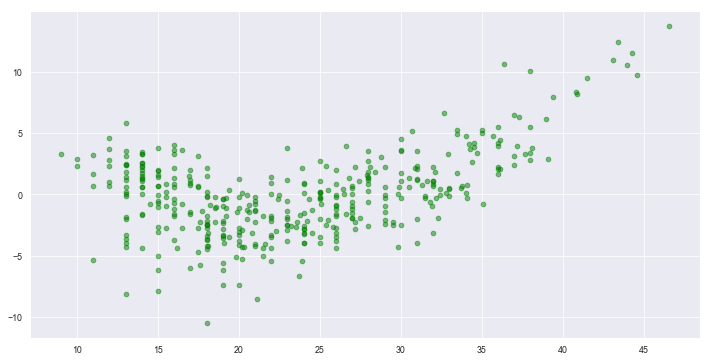

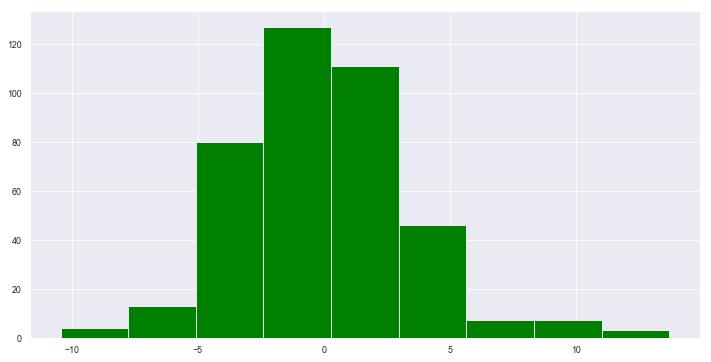

In [240]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['displacement', 'weight','cylinders','horsepower','acceleration','origin','model year','id']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid,c="green", alpha=0.5)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9,color="green")
plot_lib.show()


### 📊Observations
> Even though the R-Squared value is significant, there is a very high multicolinearity due to a the variables included. Let's try removing those variables and re-build the model.



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2766.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          1.11e-303
Time:                        21:59:23   Log-Likelihood:                -1128.1
No. Observations:                 398   AIC:                             2266.
Df Residuals:                     393   BIC:                             2286.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -2.8976      0.145    -19.971   

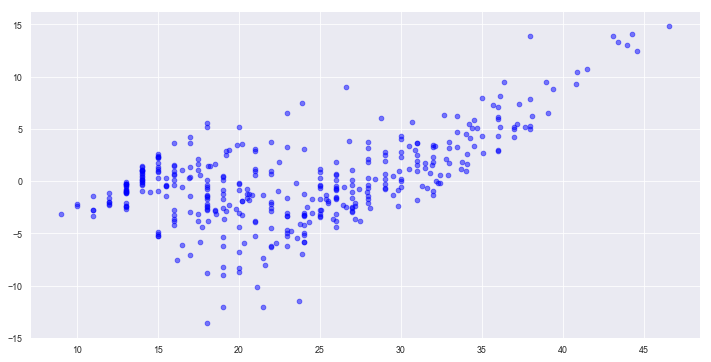

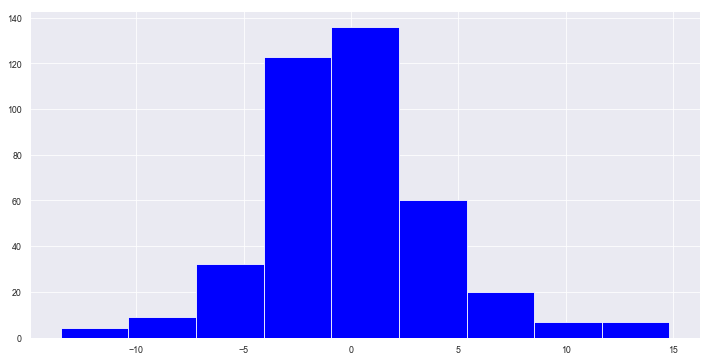

In [242]:
# Create linear regression object
regression_model = stats_lib.OLS(endog=cars_data['mpg'], exog=cars_data[['cylinders','acceleration','origin','model year','id']], missing='drop')

results = regression_model.fit()
print(results.summary())
plot_lib.figure()
plot_lib.scatter(cars_data['mpg'], results.resid,c="blue", alpha=0.5)
plot_lib.show()
plot_lib.figure()
plot_lib.hist(results.resid,bins=9,color="blue")
plot_lib.show()


### 📊Observations
> As we notice from the above model, removing the variables displacement, horsepower and weight which were to be found with high multicolinearity, the R-squared value is slighly affected but no error regarding multicollinearity are thrown. This can be considered as an accurate model for analysing the given data.



- 🔘Examination of the Mediation Effect